In [ ]:
# ----------------------------
# Step 0: Load COSMIC actionability TXT file
# ----------------------------

import pandas as pd

# Load the TXT file (assuming tab-delimited; update path)
cosmic_df = pd.read_csv('/content/ActionabilityData (1) (1).txt', sep='\t', header=0)

# Preview first few rows
print("First 5 rows:")
print(cosmic_df.head())

# Check column names
print("\nColumns in the dataset:")
print(cosmic_df.columns)


First 5 rows:
                                           MUTATION_REMARK  \
0  BCL2  (BCL2_unspecified or BCL6_unspecified) and MYC...   
1  BCL2  (BCL2_unspecified or BCL6_unspecified) and MYC...   
2  BCL2  (BCL2_unspecified or BCL6_unspecified) and MYC...   
3  BCL2  (BCL2_unspecified or BCL6_unspecified) and MYC...   
4  BCL2  (BCL2_unspecified or BCL6_unspecified) and MYC...   

  GENOMIC_MUTATION_ID  FUSION_ID MUTATION_AA_SYNTAX  \
0                 NaN        NaN                NaN   
1                 NaN        NaN                NaN   
2                 NaN        NaN                NaN   
3                 NaN        NaN                NaN   
4                 NaN        NaN                NaN   

                                             DISEASE  ACTIONABILITY_RANK  \
0  haematopoietic and lymphoid tissue / lymphoid ...                   3   
1  haematopoietic and lymphoid tissue / lymphoid ...                   3   
2  haematopoietic and lymphoid tissue / lymphoid ...  

/tmp/ipython-input-1251516143.py:8: DtypeWarning: Columns (27,28,30,34,44,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  cosmic_df = pd.read_csv('/content/ActionabilityData (1) (1).txt', sep='\t', header=0)


In [ ]:
# ----------------------------
# Step 1: Filter for TNBC / breast cancer
# ----------------------------

# Filter any breast cancer
breast_df = cosmic_df[cosmic_df['DISEASE'].str.contains('breast', case=False, na=False)]

# Further filter specifically for TNBC
tnbc_df = breast_df[breast_df['DISEASE'].str.contains('triple-negative|tnbc', case=False, na=False)]

print(f"Total breast cancer entries: {breast_df.shape[0]}")
print(f"Total TNBC-specific entries: {tnbc_df.shape[0]}")

# Preview filtered data
tnbc_df.head()


Total breast cancer entries: 1541
Total TNBC-specific entries: 91


,,MUTATION_REMARK,GENOMIC_MUTATION_ID,FUSION_ID,MUTATION_AA_SYNTAX,DISEASE,ACTIONABILITY_RANK,DEVELOPMENT_STATUS,DRUG_COMBINATION,TESTING_REQUIRED,...,RFS_TREAT,RFS_CON,RFS_HR,RFS_CI,RFS_PVAL,BLOOD_RESPONSE,RESPONSE_VALUE,TIMEPOINT,CLASSIFICATION_ID,LAST_UPDATED
137,AKT1,AKT1_unspecified or ATM_unspecified or ATR_uns...,NaN,NaN,NaN,breast / carcinoma / basal (triple-negative) c...,3,Phase 2,Capecitabine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSO283911696,2021May18
156,AKT1,AKT1_unspecified or PIK3CA_unspecified or PTEN...,NaN,NaN,NaN,breast / carcinoma / basal (triple-negative) c...,3,Phase 2,Atezolizumab + Cyclophosphamide + Doxorubicin ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSO283911696,2022Oct24
475,AR,AR_unspecified,NaN,NaN,NaN,breast / carcinoma / basal (triple-negative) c...,3,Phase 1,Avelumab + Palbociclib,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSO283911696,2022Dec09
476,AR,AR_unspecified,NaN,NaN,NaN,breast / carcinoma / basal (triple-negative) c...,3,Phase 2,Enzalutamide,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSO283911696,2022Nov28
477,AR,AR_unspecified,NaN,NaN,NaN,breast / carcinoma / basal (triple-negative) c...,3,Phase 2,Carboplatin + Cyclophosphamide + Epirubicin + ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COSO283911696,2023Jan13


In [ ]:
# ----------------------------
# Step 2: Inspect key columns
# ----------------------------

key_cols = ['DRUG_COMBINATION', 'DEVELOPMENT_STATUS', 'ACTIONABILITY_RANK', 'TRIAL_ID']

for col in key_cols:
    if col in tnbc_df.columns:
        print(f"\nColumn: {col}")
        print(f"Unique values (sample): {tnbc_df[col].dropna().unique()[:10]}")
        print(f"Number of missing/blank values: {tnbc_df[col].isna().sum()}")
        if tnbc_df[col].dtype == object:
            print(f"Number of empty strings: {(tnbc_df[col] == '').sum()}")
    else:
        print(f"\nColumn {col} not found in the dataset!")



Column: DRUG_COMBINATION
Unique values (sample): ['Capecitabine'
 'Atezolizumab + Cyclophosphamide + Doxorubicin hydrochloride + Ipatasertib + Paclitaxel'
 'Avelumab + Palbociclib' 'Enzalutamide'
 'Carboplatin + Cyclophosphamide + Epirubicin + Nab-paclitaxel'
 'Carboplatin + Cyclophosphamide + Epirubicin + Nab-paclitaxel + Pyrotinib'
 'Dexamethasone + Docetaxel + Seviteronel' 'Bicalutamide + Ribociclib'
 'Enobosarm + Pembrolizumab' 'Enobosarm']
Number of missing/blank values: 0
Number of empty strings: 0

Column: DEVELOPMENT_STATUS
Unique values (sample): ['Phase 2' 'Phase 1' 'Phase 3' 'Approved FDA']
Number of missing/blank values: 0
Number of empty strings: 0

Column: ACTIONABILITY_RANK
Unique values (sample): [3 2]
Number of missing/blank values: 0

Column: TRIAL_ID
Unique values (sample): ['NCT04768426' 'NCT05498896' 'NCT04360941' 'NCT02676986' 'NCT05582499'
 'NCT04947189' 'NCT03090165' 'NCT02971761' 'NCT02368691' 'NCT02130700']
Number of missing/blank values: 0
Number of empty st

In [ ]:
# ----------------------------
# Step 3: Inspect unique values and counts for key columns
# ----------------------------

columns_to_check = ['DRUG_COMBINATION', 'DEVELOPMENT_STATUS', 'ACTIONABILITY_RANK', 'TRIAL_ID']

for col in columns_to_check:
    print(f"\nColumn: {col}")
    counts = tnbc_df[col].value_counts(dropna=False)
    print(counts)
    print("Number of missing/blank values:", tnbc_df[col].isna().sum())
    print("Number of empty strings:", (tnbc_df[col] == '').sum())



Column: DRUG_COMBINATION
DRUG_COMBINATION
Pembrolizumab                                    6
Avelumab + Palbociclib                           5
Eribulin + Pembrolizumab                         4
Atezolizumab + Nab-paclitaxel                    3
Durvalumab                                       3
                                                ..
Atezolizumab + Chemotherapy                      1
Avelumab                                         1
Gefitinib                                        1
Cyclophosphamide + Olaparib + Radiotherapy       1
Galinpepimut-S + Pembrolizumab + Sargramostim    1
Name: count, Length: 66, dtype: int64
Number of missing/blank values: 0
Number of empty strings: 0

Column: DEVELOPMENT_STATUS
DEVELOPMENT_STATUS
Phase 2         54
Phase 1         20
Phase 3         15
Approved FDA     2
Name: count, dtype: int64
Number of missing/blank values: 0
Number of empty strings: 0

Column: ACTIONABILITY_RANK
ACTIONABILITY_RANK
2    64
3    27
Name: count, dtype: int6

In [ ]:
# ----------------------------
# Step 3b: Rename first column to GENE
# ----------------------------
tnbc_df = tnbc_df.rename(columns={tnbc_df.columns[0]: 'GENE'})

# ----------------------------
# Step 3c: Map DEVELOPMENT_STATUS to numeric scores
# ----------------------------
status_mapping = {
    'Approved FDA': 5,
    'Phase 3': 4,
    'Phase 2': 3,
    'Phase 1': 2
}

tnbc_df['DEV_SCORE'] = tnbc_df['DEVELOPMENT_STATUS'].map(status_mapping)

# ----------------------------
# Step 3d: Aggregate by DRUG_COMBINATION
# - Take highest development score per drug
# - Minimum actionability rank (better rank)
# - Count number of trials
# - Combine all associated genes into a comma-separated string
# ----------------------------
drug_summary = tnbc_df.groupby('DRUG_COMBINATION').agg(
    BEST_DEVELOPMENT_SCORE=('DEV_SCORE', 'max'),
    ACTIONABILITY_RANK=('ACTIONABILITY_RANK', 'min'),
    NUM_TRIALS=('TRIAL_ID', 'nunique'),
    GENES=('GENE', lambda x: ', '.join(sorted(x.unique())))
).reset_index()

# Map numeric score back to status label
inverse_status = {v: k for k, v in status_mapping.items()}
drug_summary['BEST_DEVELOPMENT_STATUS'] = drug_summary['BEST_DEVELOPMENT_SCORE'].map(inverse_status)

# Preview aggregated data
drug_summary.head()


,DRUG_COMBINATION,BEST_DEVELOPMENT_SCORE,ACTIONABILITY_RANK,NUM_TRIALS,GENES,BEST_DEVELOPMENT_STATUS
0,Alpelisib + Olaparib,2,3,1,BRCA1,Phase 1
1,Anlotinib + Anthracycline + Nab-paclitaxel + T...,3,2,1,CD274,Phase 2
2,Anti-HER2/HER3 Dendritic Cell Vaccine + Celeco...,3,2,1,CD274,Phase 2
3,Apatinib + Camrelizumab + Nab-paclitaxel,4,2,1,CD274,Phase 3
4,Apatinib + Carboplatin + Nab-paclitaxel + Sint...,3,2,1,CD274,Phase 2


In [ ]:
# ----------------------------
# Step 4: Compute composite score prioritizing approval
# ----------------------------

# Assign a large base weight to development status
# Approved = 100, Phase 3 = 50, Phase 2 = 30, Phase 1 = 10
dev_weight_mapping = {
    'Approved FDA': 100,
    'Phase 3': 50,
    'Phase 2': 30,
    'Phase 1': 10
}

drug_summary['DEV_WEIGHT'] = drug_summary['BEST_DEVELOPMENT_STATUS'].map(dev_weight_mapping)

# Add minor contributions from actionability rank and number of trials
# Better actionability rank adds slightly, more trials add a small amount
drug_summary['TOTAL_SCORE'] = (
    drug_summary['DEV_WEIGHT'] +
    (5 - drug_summary['ACTIONABILITY_RANK'])*2 +  # better rank adds a little
    drug_summary['NUM_TRIALS']                     # more trials add a small amount
)

# Rank drugs by total score
drug_summary = drug_summary.sort_values('TOTAL_SCORE', ascending=False).reset_index(drop=True)

# Top 20 drugs
top20_drugs = drug_summary.head(20)[[
    'DRUG_COMBINATION',
    'GENES',
    'BEST_DEVELOPMENT_STATUS',
    'ACTIONABILITY_RANK',
    'NUM_TRIALS',
    'TOTAL_SCORE'
]]

top20_drugs.reset_index(drop=True, inplace=True)
top20_drugs


,DRUG_COMBINATION,GENES,BEST_DEVELOPMENT_STATUS,ACTIONABILITY_RANK,NUM_TRIALS,TOTAL_SCORE
0,Chemotherapy + Pembrolizumab,CD274,Approved FDA,2,2,108
1,Atezolizumab + Ipatasertib + Paclitaxel,CD274,Phase 3,2,2,58
2,Atezolizumab + Nab-paclitaxel,CD274,Phase 3,2,2,58
3,Pembrolizumab + Sacituzumab govitecan,CD274,Phase 3,2,1,57
4,Camrelizumab + Nab-paclitaxel,CD274,Phase 3,2,1,57
5,Apatinib + Camrelizumab + Nab-paclitaxel,CD274,Phase 3,2,1,57
6,Atezolizumab + Chemotherapy,CD274,Phase 3,2,1,57
7,Atezolizumab + Cyclophosphamide + Doxorubicin ...,CD274,Phase 3,2,1,57
8,Bicalutamide,AR,Phase 3,3,3,57
9,Atezolizumab + Capecitabine + Carboplatin + Ge...,CD274,Phase 3,2,1,57


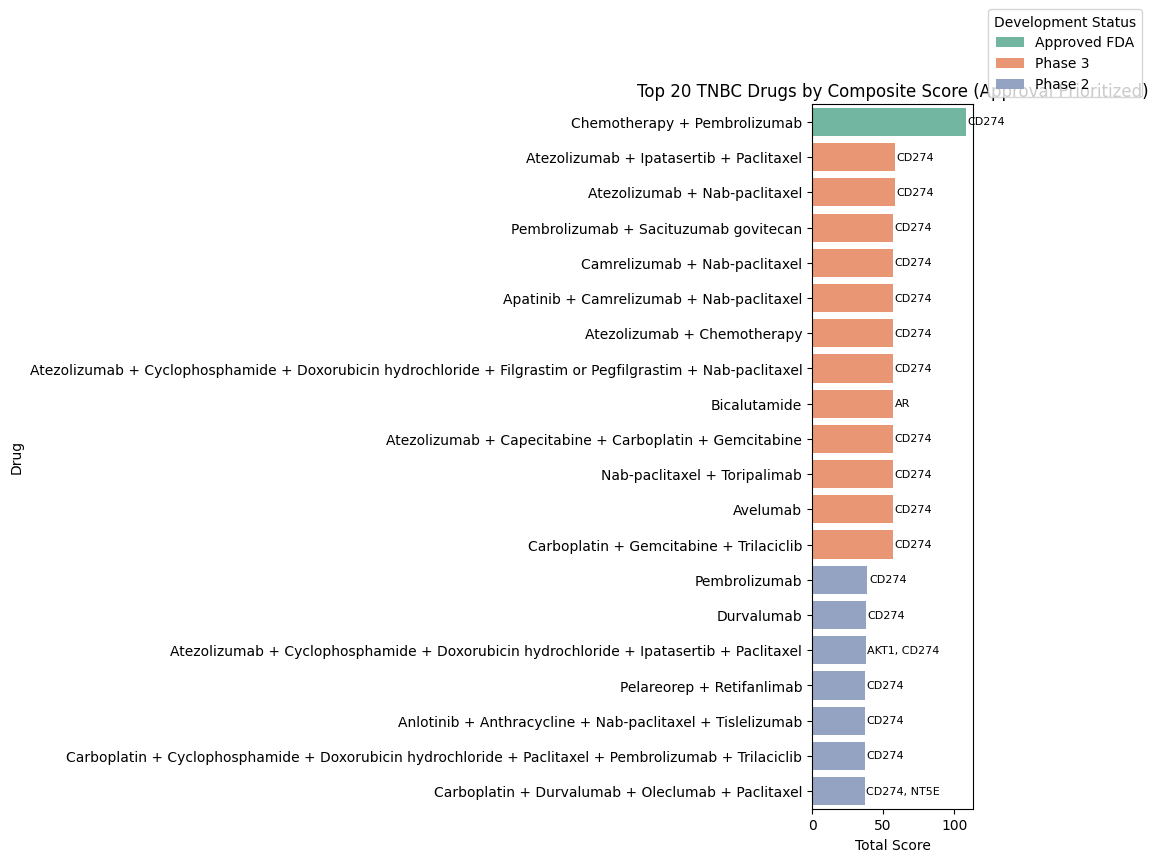

In [ ]:
# ----------------------------
# Step 5: Visualize top 20 drugs
# ----------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

# Barplot of total score
sns.barplot(
    data=top20_drugs,
    x='TOTAL_SCORE',
    y='DRUG_COMBINATION',
    hue='BEST_DEVELOPMENT_STATUS',
    dodge=False,
    palette='Set2'
)

# Add gene annotations next to each bar
for index, row in top20_drugs.iterrows():
    plt.text(
        row['TOTAL_SCORE'] + 1,  # offset slightly to the right
        index,
        row['GENES'],
        va='center',
        fontsize=8
    )

plt.title("Top 20 TNBC Drugs by Composite Score (Approval Prioritized)")
plt.xlabel("Total Score")
plt.ylabel("Drug")
plt.legend(title='Development Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


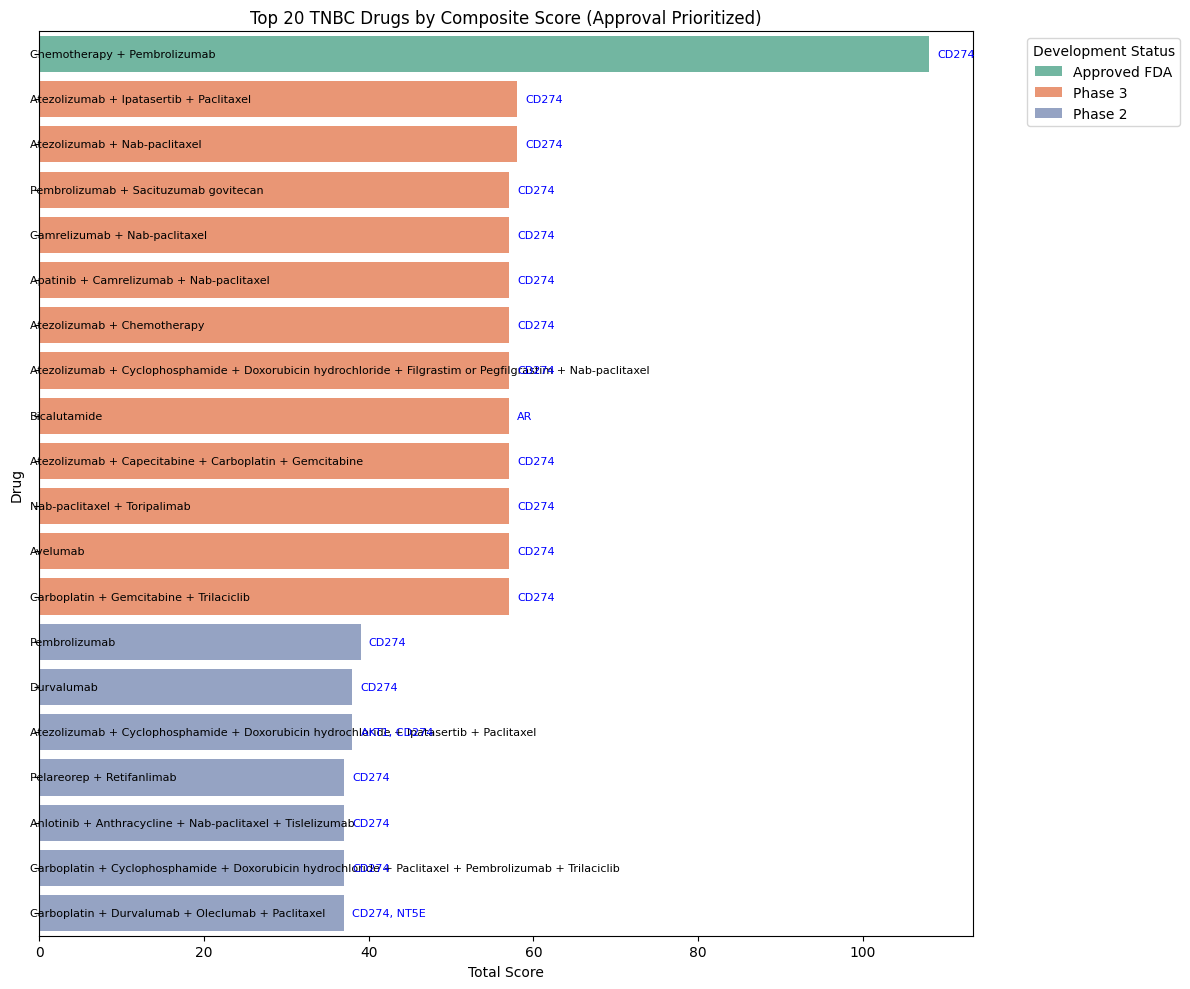

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))

# Horizontal barplot
sns.barplot(
    data=top20_drugs,
    x='TOTAL_SCORE',
    y=top20_drugs['DRUG_COMBINATION'],
    hue='BEST_DEVELOPMENT_STATUS',
    dodge=False,
    palette='Set2'
)

# Extend y-axis labels over the bars
plt.yticks(fontsize=8, va='center', ha='left')  # align left so it extends onto bar

# Add gene annotation at end of bar
for index, row in top20_drugs.iterrows():
    plt.text(
        row['TOTAL_SCORE'] + 1,  # slightly past the bar end
        index,
        row['GENES'],
        va='center',
        fontsize=8,
        color='blue'
    )

plt.title("Top 20 TNBC Drugs by Composite Score (Approval Prioritized)", fontsize=12)
plt.xlabel("Total Score")
plt.ylabel("Drug")
plt.legend(title='Development Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [ ]:
top20_table.to_csv("TNBC_top20_drugs.csv", index=False)


/tmp/ipython-input-3092261233.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


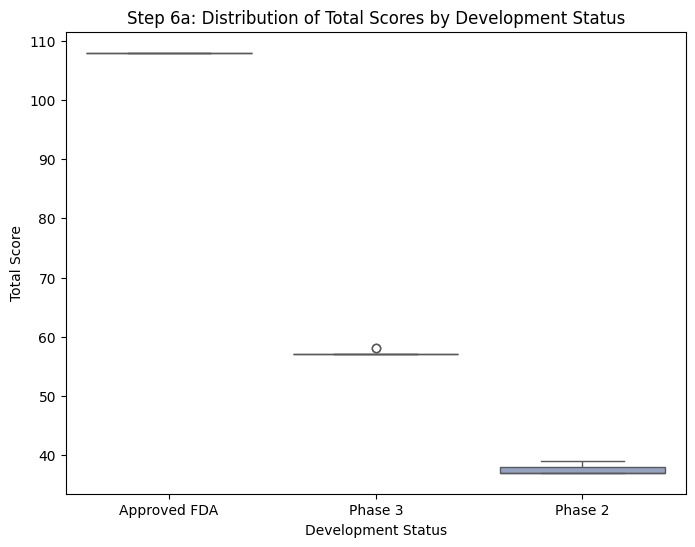

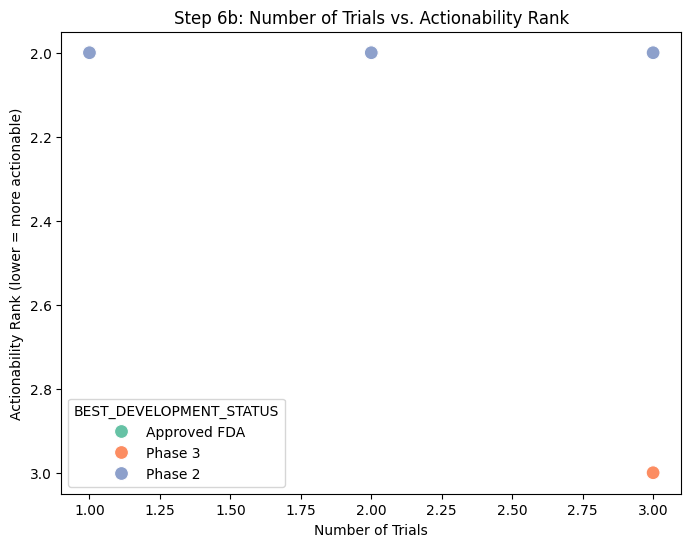

/tmp/ipython-input-3092261233.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


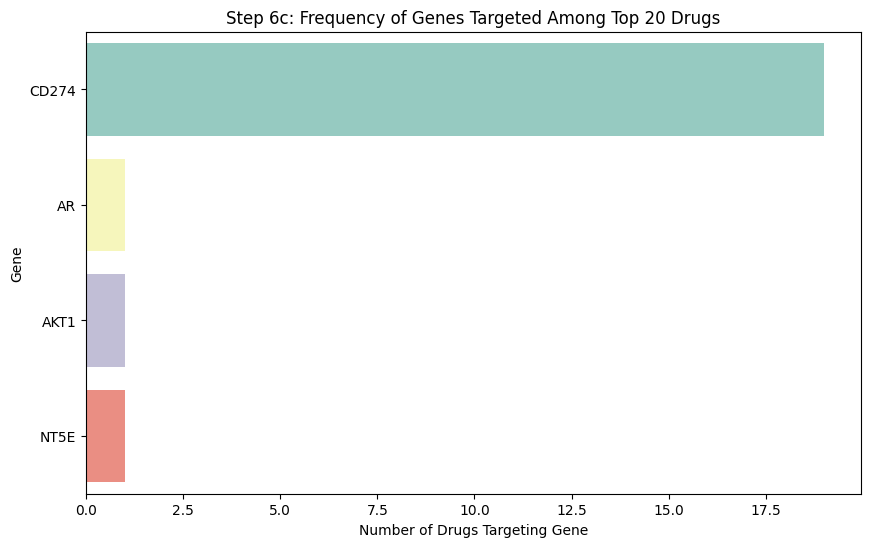

In [ ]:
# ----------------------------
# Step 6a: Compare total scores by development status
# ----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(
    data=top20_drugs,
    x='BEST_DEVELOPMENT_STATUS',
    y='TOTAL_SCORE',
    palette='Set2'
)
plt.title("Step 6a: Distribution of Total Scores by Development Status")
plt.ylabel("Total Score")
plt.xlabel("Development Status")
plt.show()


# ----------------------------
# Step 6b: Plot number of trials vs. actionability rank
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=top20_drugs,
    x='NUM_TRIALS',
    y='ACTIONABILITY_RANK',
    hue='BEST_DEVELOPMENT_STATUS',
    palette='Set2',
    s=100
)
plt.title("Step 6b: Number of Trials vs. Actionability Rank")
plt.xlabel("Number of Trials")
plt.ylabel("Actionability Rank (lower = more actionable)")
plt.gca().invert_yaxis()  # rank 1 at top
plt.show()


# ----------------------------
# Step 6c: Check which genes are most frequently targeted
# ----------------------------
from collections import Counter

# Split GENES into individual genes
all_genes = []
for genes in top20_drugs['GENES']:
    all_genes.extend(genes.split(', '))

gene_counts = Counter(all_genes)
gene_counts_df = pd.DataFrame.from_dict(gene_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=gene_counts_df.reset_index().rename(columns={'index':'GENE'}),
    x='Count',
    y='GENE',
    palette='Set3'
)
plt.title("Step 6c: Frequency of Genes Targeted Among Top 20 Drugs")
plt.xlabel("Number of Drugs Targeting Gene")
plt.ylabel("Gene")
plt.show()


In [ ]:
# ----------------------------
# Step 7a: Generate full ranked list of TNBC drugs
# ----------------------------
all_drugs_ranked = drug_summary.sort_values('TOTAL_SCORE', ascending=False).reset_index(drop=True)
all_drugs_ranked.to_csv("TNBC_all_drugs_ranked.csv", index=False)  # save for reference
all_drugs_ranked.head(20)  # preview top 20


# ----------------------------
# Step 7b: Filter drugs by development status, genes, or actionability
# ----------------------------

# Example: filter all approved drugs
approved_drugs = all_drugs_ranked[all_drugs_ranked['BEST_DEVELOPMENT_STATUS'] == 'Approved FDA']
print("Top approved drugs:")
print(approved_drugs.head(10))

# Example: filter drugs targeting a specific gene
gene_of_interest = "TP53"
gene_targeted_drugs = all_drugs_ranked[all_drugs_ranked['GENES'].str.contains(gene_of_interest)]
print(f"Drugs targeting {gene_of_interest}:")
print(gene_targeted_drugs.head(10))

# Example: filter by actionability rank <= 2
highly_actionable_drugs = all_drugs_ranked[all_drugs_ranked['ACTIONABILITY_RANK'] <= 2]
print("Highly actionable drugs (rank <=2):")
print(highly_actionable_drugs.head(10))


Top approved drugs:
               DRUG_COMBINATION  BEST_DEVELOPMENT_SCORE  ACTIONABILITY_RANK  \
0  Chemotherapy + Pembrolizumab                       5                   2   

   NUM_TRIALS  GENES BEST_DEVELOPMENT_STATUS  DEV_WEIGHT  TOTAL_SCORE  
0           2  CD274            Approved FDA         100          108  
Drugs targeting TP53:
                              DRUG_COMBINATION  BEST_DEVELOPMENT_SCORE  \
56  Cyclophosphamide + Olaparib + Radiotherapy                       3   

    ACTIONABILITY_RANK  NUM_TRIALS GENES BEST_DEVELOPMENT_STATUS  DEV_WEIGHT  \
56                   3           1  TP53                 Phase 2          30   

    TOTAL_SCORE  
56           35  
Highly actionable drugs (rank <=2):
                                     DRUG_COMBINATION  BEST_DEVELOPMENT_SCORE  \
0                        Chemotherapy + Pembrolizumab                       5   
1             Atezolizumab + Ipatasertib + Paclitaxel                       4   
2                       Atezol

In [ ]:
import sys
print(sys.version)


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
